In [1]:
# 예측 결과 가져와서 확인하기

#weather 데이터셋 가져오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# result 가져오기 - 
res = 'long_term_forecast_weather_96_96_D_DLinear_decomp_custom_ftM_sl96_ll48_pl96_dm512_nh8_el3_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725876337)'
path = f'./results/{res}/'

pred_data = np.load(path + 'pred.npy') # 
true_data = np.load(path + 'true.npy') # 
pred_t_data = np.load(path + 'pred_trend.npy') # 
true_t_data = np.load(path + 'true_trend.npy') #
pred_s_data = np.load(path + 'pred_seasonal.npy')
true_s_data = np.load(path + 'true_seasonal.npy')


In [6]:
pred_data.shape, true_data.shape, pred_t_data.shape, true_t_data.shape, pred_s_data.shape, true_s_data.shape

((10444, 96, 21),
 (10444, 96, 21),
 (10444, 96, 21),
 (10444, 96, 21),
 (10444, 96, 21),
 (10444, 96, 21))

In [7]:
from utils.metrics import *

In [10]:
metric(pred_data, true_data), metric(pred_t_data, true_t_data), metric(pred_s_data, true_s_data)

/home/yohan/study/piformer/utils/metrics.py:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((true - pred) / true))
/home/yohan/study/piformer/utils/metrics.py:31: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.square((true - pred) / true))


((0.25611007, 0.19622044, 0.44296777, 13.08518, 16845246.0),
 (0.24444199, 0.1495358, 0.3866986, 3.2038639, 223230.14),
 (0.080877945, 0.04260104, 0.2064002, inf, inf))

In [11]:
%matplotlib inline

In [107]:
# series_decomp 호출
from layers.Autoformer_EncDec import series_decomp, moving_avg

decomp25 = series_decomp(25) # 기본 moving avg 25
decomp97 = series_decomp(97) # 97
decomp101 = series_decomp(101)

In [108]:
mvg_25 = moving_avg(25, 1)

In [113]:
import torch

mvg_25(torch.Tensor(true_data[95:96, :, :])).shape

torch.Size([1, 96, 21])

In [115]:
decomp25(torch.Tensor(true_data))[0].shape

torch.Size([10444, 96, 21])

0.0
0.0



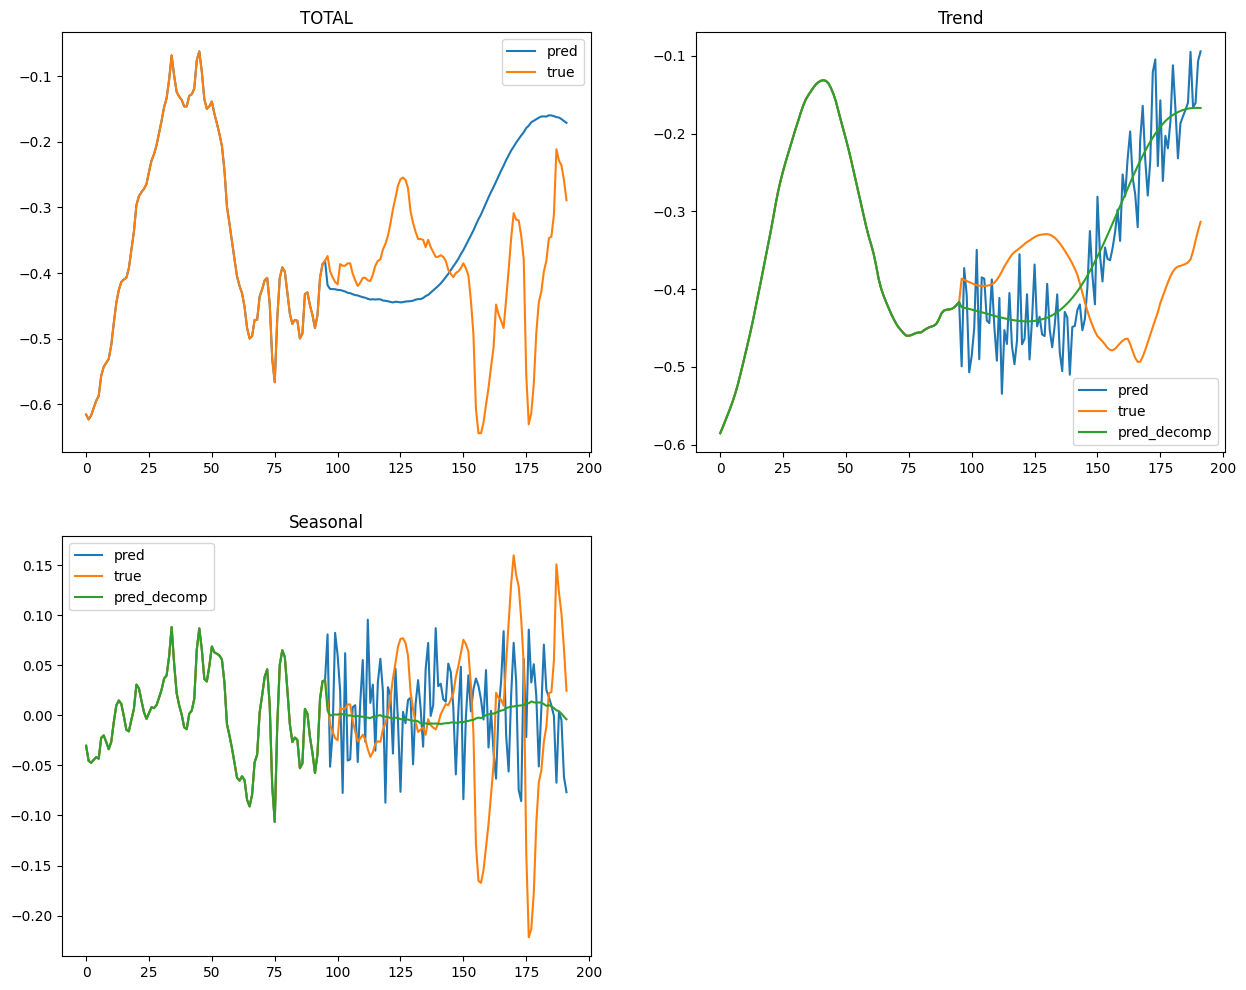

In [119]:
# plot
idx = 1221
var = 5
xr = range(192)
X_OBJ = [[true_data, pred_data], [true_t_data, pred_t_data], [true_s_data, pred_s_data]]
pred_d_s_data, pred_d_t_data = decomp25(torch.Tensor(pred_data))
pred_d_s_data, pred_d_t_data = pred_d_s_data.detach().cpu().numpy(), pred_d_t_data.detach().cpu().numpy()
true_d_s_data, true_d_t_data = decomp25(torch.Tensor(true_data))
true_d_s_data, true_d_t_data = true_d_s_data.detach().cpu().numpy(), true_d_t_data.detach().cpu().numpy()

print(MSE(true_d_s_data, true_s_data))
print(MSE(true_d_t_data, true_t_data))
print()
ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])

y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

In [23]:
MSE(pred_t_data + pred_s_data, pred_data)

0.0

In [27]:
# result 가져오기 - 
res = 'long_term_forecast_weather_96_96_D_Ind_DLinear_decomp_custom_ftM_sl96_ll48_pl96_dm512_nh8_el5_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725883812)'
path = f'./results/{res}/'

pred_data2 = np.load(path + 'pred.npy') # 
true_data2 = np.load(path + 'true.npy') # 
pred_t_data2 = np.load(path + 'pred_trend.npy') # 
true_t_data2 = np.load(path + 'true_trend.npy') #
pred_s_data2 = np.load(path + 'pred_seasonal.npy')
true_s_data2 = np.load(path + 'true_seasonal.npy')


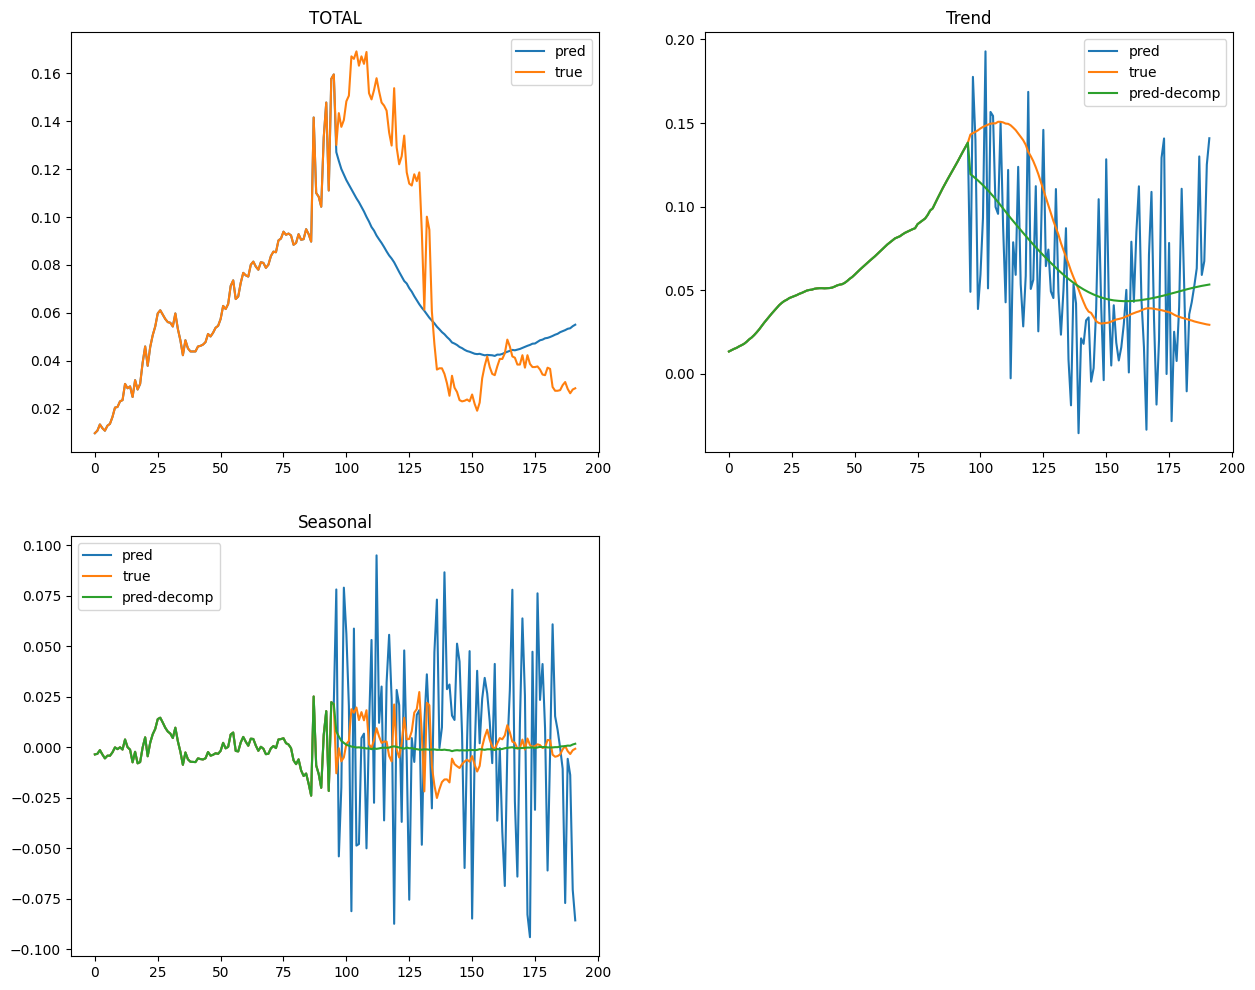

In [122]:
# plot
idx = 840
var = -1
xr = range(192)
X_OBJ = [[true_data2, pred_data2], [true_t_data2, pred_t_data2], [true_s_data2, pred_s_data2]]

pred_d_s_data2, pred_d_t_data2 = decomp25(torch.Tensor(pred_data2))
pred_d_s_data2, pred_d_t_data2 = pred_d_s_data2.detach().cpu().numpy(), pred_d_t_data2.detach().cpu().numpy()
true_d_s_data2, true_d_t_data2 = decomp25(torch.Tensor(true_data2))
true_d_s_data2, true_d_t_data2 = true_d_s_data2.detach().cpu().numpy(), true_d_t_data2.detach().cpu().numpy()

ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])

y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data2[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data2[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred-decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred-decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

In [31]:
# result 가져오기 - 
res = 'long_term_forecast_Exchange_96_96_dlinear_m101_DLinear_decomp_custom_ftM_sl96_ll24_pl96_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725882925)'
path = f'./results/{res}/'

pred_data_e = np.load(path + 'pred.npy') # 
true_data_e = np.load(path + 'true.npy') # 
pred_t_data_e = np.load(path + 'pred_trend.npy') # 
true_t_data_e = np.load(path + 'true_trend.npy') #
pred_s_data_e = np.load(path + 'pred_seasonal.npy')
true_s_data_e = np.load(path + 'true_seasonal.npy')


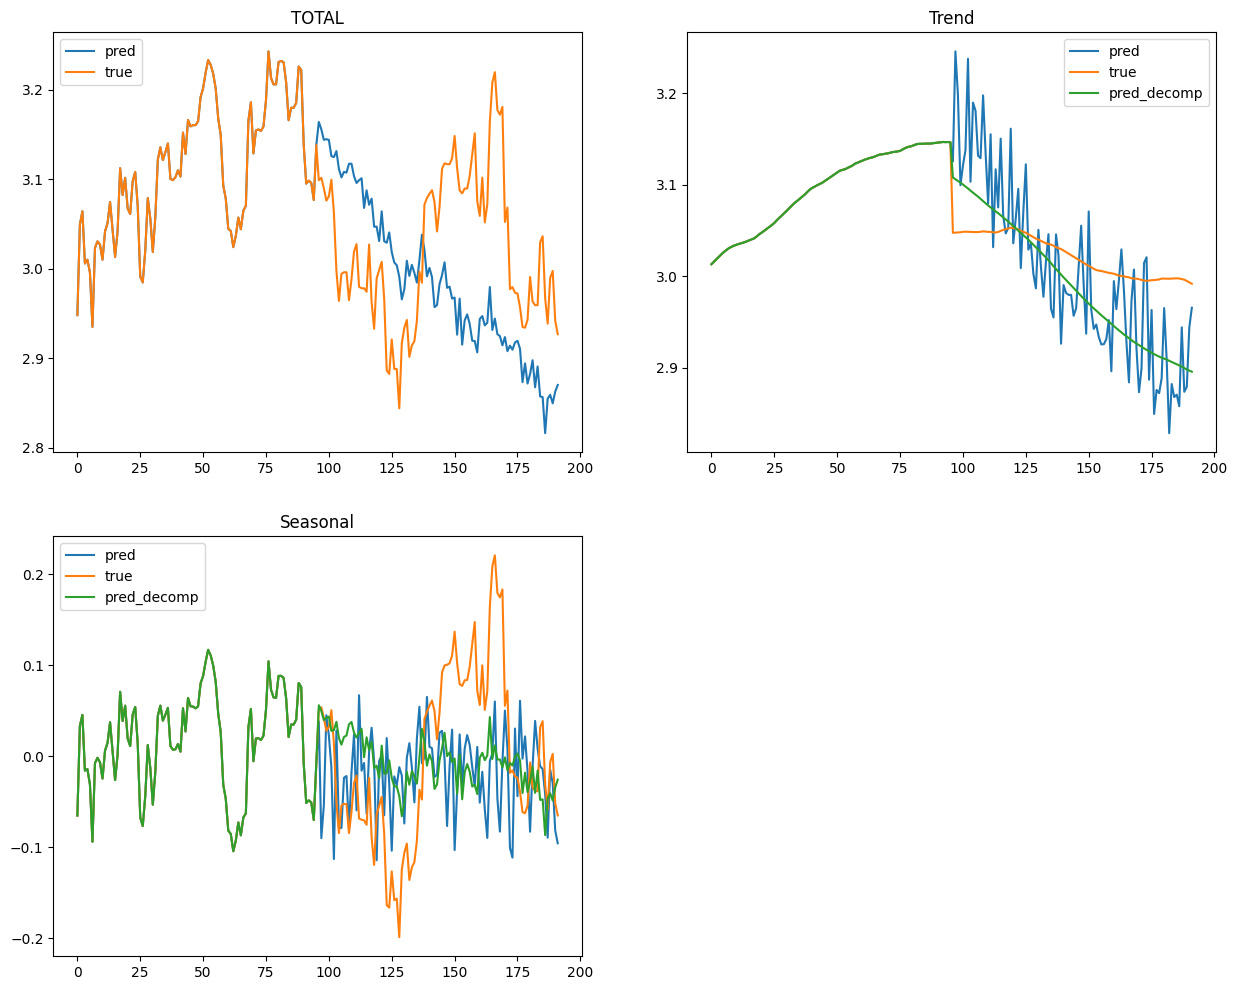

In [136]:
# plot
idx = 0
var = 0
xr = range(192)
X_OBJ = [[true_data_e, pred_data_e], [true_t_data_e, pred_t_data_e], [true_s_data_e, pred_s_data_e]]

pred_d_s_data_e, pred_d_t_data_e = decomp101(torch.Tensor(pred_data_e))
pred_d_s_data_e, pred_d_t_data_e = pred_d_s_data_e.detach().cpu().numpy(), pred_d_t_data_e.detach().cpu().numpy()

ttype = 5
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])

y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_e[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_e[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

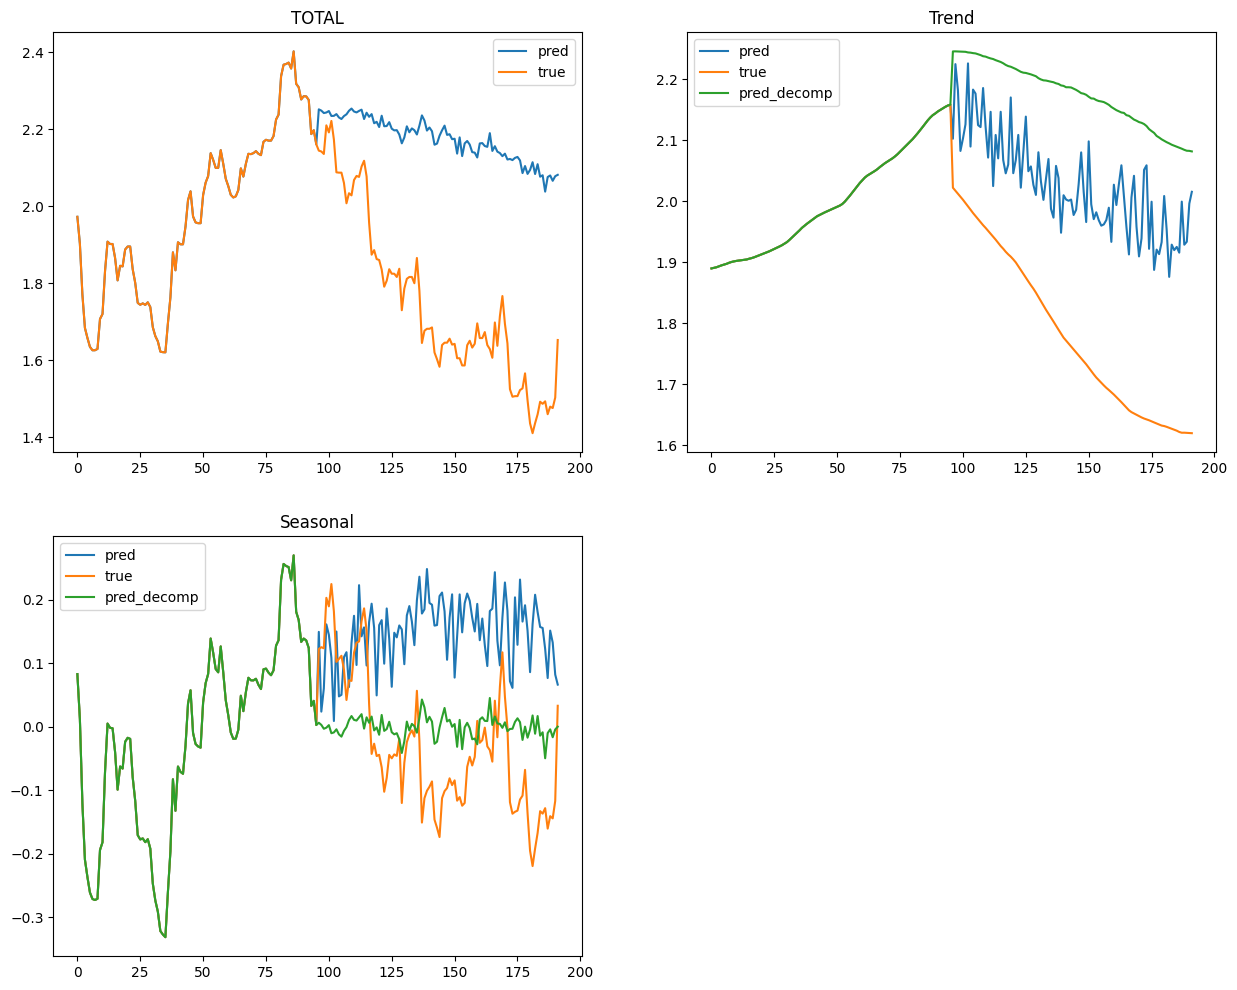

In [137]:
# plot
idx = 270
var = 0
xr = range(192)
X_OBJ = [[true_data_e, pred_data_e], [true_t_data_e, pred_t_data_e], [true_s_data_e, pred_s_data_e]]
pred_d_s_data_e, pred_d_t_data_e = decomp25(torch.Tensor(pred_data_e))
pred_d_s_data_e, pred_d_t_data_e = pred_d_s_data_e.detach().cpu().numpy(), pred_d_t_data_e.detach().cpu().numpy()

ttype = -1
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])
y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_e[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_e[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

In [80]:
# result 가져오기 - 
res = 'long_term_forecast_Exchange_96_48_piformer_PITS_decomp_custom_ftM_sl96_ll24_pl96_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725882596)'
path = f'./results/{res}/'

pred_data_e2 = np.load(path + 'pred.npy') # 
true_data_e2 = np.load(path + 'true.npy') # 
pred_t_data_e2 = np.load(path + 'pred_trend.npy') # 
true_t_data_e2 = np.load(path + 'true_trend.npy') #
pred_s_data_e2 = np.load(path + 'pred_seasonal.npy')
true_s_data_e2 = np.load(path + 'true_seasonal.npy')


In [88]:
MSE(true_data_e[92], true_data_e2[92]), MSE(true_data_e[92], true_data_e3[92])

(0.0, 0.0)

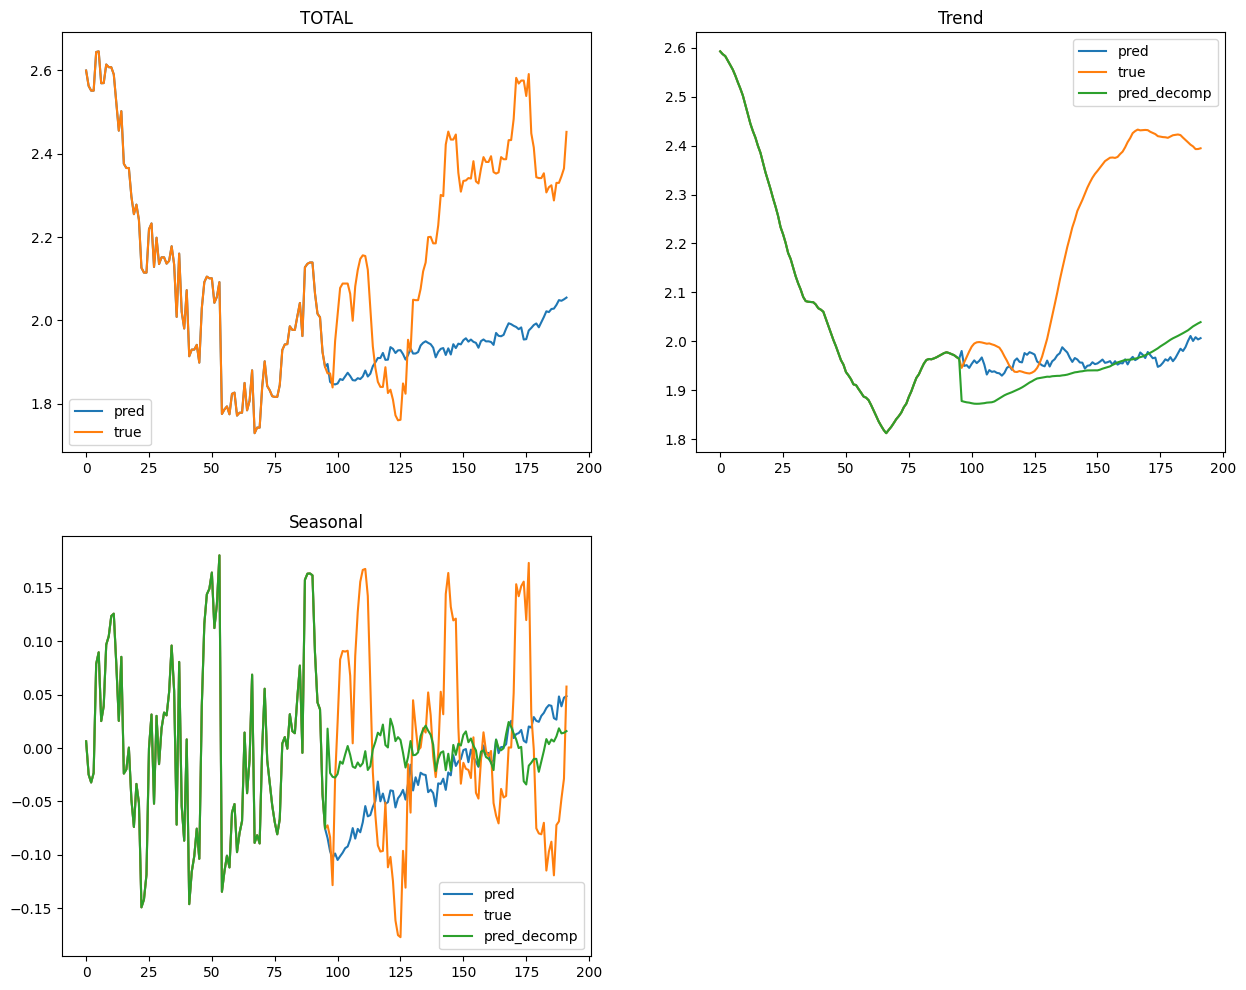

In [131]:
# plot
idx = 180
var = -1
xr = range(192)
X_OBJ = [[true_data_e2, pred_data_e2], [true_t_data_e2, pred_t_data_e2], [true_s_data_e2, pred_s_data_e2]]

pred_d_s_data_e2, pred_d_t_data_e2 = decomp25(torch.Tensor(pred_data_e2))
pred_d_s_data_e2, pred_d_t_data_e2 = pred_d_s_data_e2.detach().cpu().numpy(), pred_d_t_data_e2.detach().cpu().numpy()

ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])

y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_e2[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_e2[idx + 96, :, var]])


plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

In [37]:
# result 가져오기 - 
res = 'long_term_forecast_Exchange_96_48_piformer_DLinear_decomp_custom_ftM_sl96_ll24_pl96_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725881910)'
path = f'./results/{res}/'

pred_data_e3 = np.load(path + 'pred.npy') # 
true_data_e3 = np.load(path + 'true.npy') # 
pred_t_data_e3 = np.load(path + 'pred_trend.npy') # 
true_t_data_e3 = np.load(path + 'true_trend.npy') #
pred_s_data_e3 = np.load(path + 'pred_seasonal.npy')
true_s_data_e3 = np.load(path + 'true_seasonal.npy')


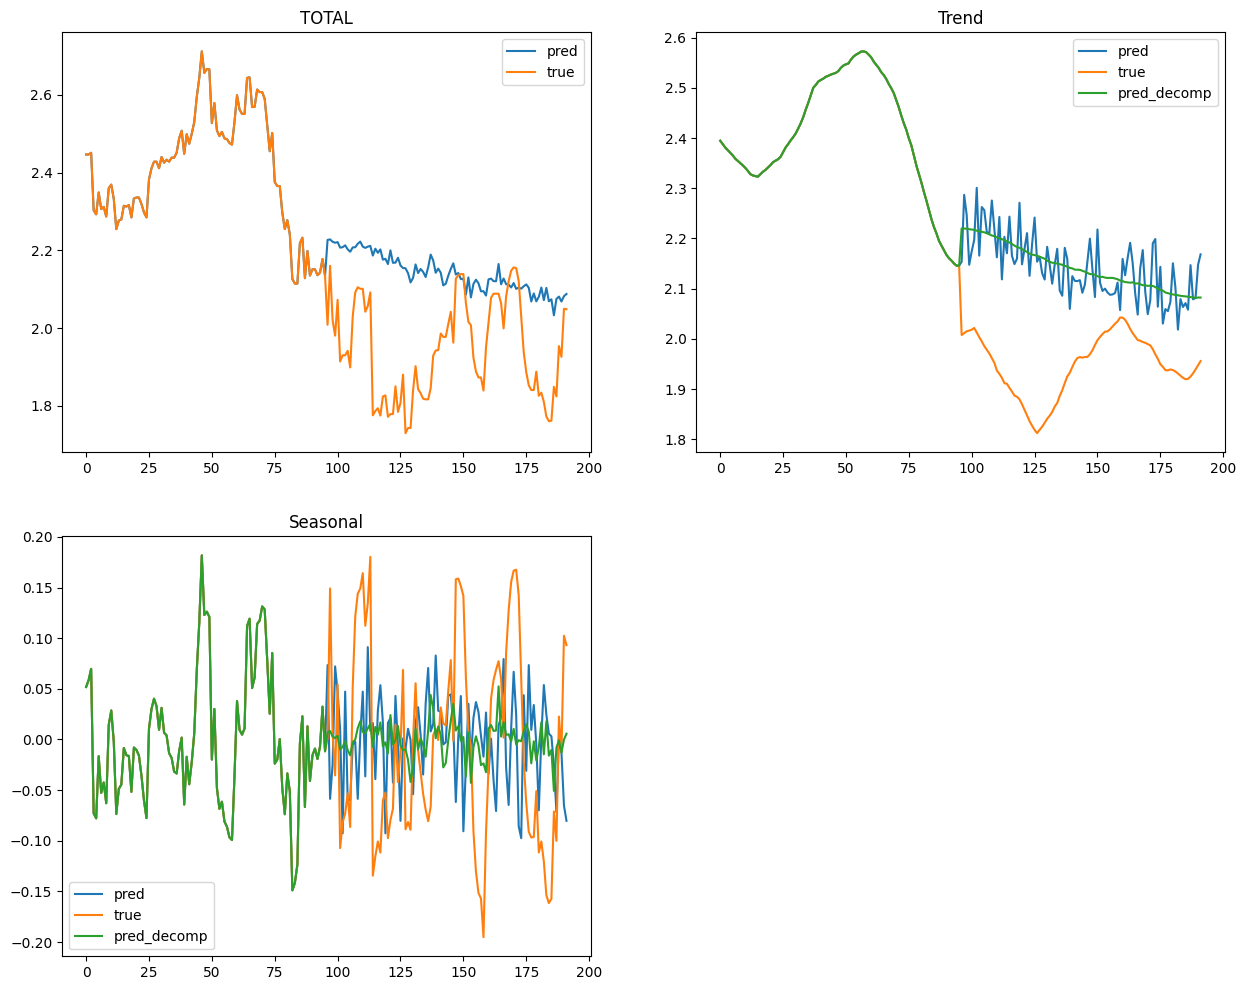

In [135]:
# plot
idx = 120
var = -1
xr = range(192)
X_OBJ = [[true_data_e3, pred_data_e3], [true_t_data_e3, pred_t_data_e3], [true_s_data_e3, pred_s_data_e3]]

pred_d_s_data_e3, pred_d_t_data_e3 = decomp25(torch.Tensor(pred_data_e3))
pred_d_s_data_e3, pred_d_t_data_e3 = pred_d_s_data_e3.detach().cpu().numpy(), pred_d_t_data_e3.detach().cpu().numpy()

ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])
y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_e3[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_e3[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

In [60]:
# 설마 
for jdx in range(100):
    print(jdx, ":", MAE(X_OBJ[1][1][jdx, :, var], X_OBJ[1][1][jdx+100, :, var]))

0 : 0.17436965
1 : 0.18728141
2 : 0.17752294
3 : 0.17842555
4 : 0.18698277
5 : 0.16853261
6 : 0.17853999
7 : 0.19059162
8 : 0.18340273
9 : 0.17797296
10 : 0.1882472
11 : 0.19191653
12 : 0.20254886
13 : 0.19980104
14 : 0.19096218
15 : 0.19350807
16 : 0.19652013
17 : 0.20362996
18 : 0.17678924
19 : 0.1751767
20 : 0.1965326
21 : 0.20111354
22 : 0.20302503
23 : 0.19860375
24 : 0.16828273
25 : 0.17800474
26 : 0.18925238
27 : 0.1813895
28 : 0.17276378
29 : 0.15641081
30 : 0.17222802
31 : 0.17835073
32 : 0.16501929
33 : 0.13266557
34 : 0.12971748
35 : 0.12688355
36 : 0.12910466
37 : 0.11997194
38 : 0.11708201
39 : 0.10985452
40 : 0.110778145
41 : 0.106770806
42 : 0.099615134
43 : 0.08731258
44 : 0.07698386
45 : 0.053198006
46 : 0.061482575
47 : 0.062013272
48 : 0.05991826
49 : 0.053080827
50 : 0.03940024
51 : 0.02846369
52 : 0.019993426
53 : 0.011513012
54 : 0.008742462
55 : 0.008535132
56 : 0.0087027075
57 : 0.008084223
58 : 0.015736736
59 : 0.033561956
60 : 0.026621217
61 : 0.0383423
62 : 0

In [63]:
# result 가져오기 - 
res = 'long_term_forecast_traffic_96_96_DLinear_decomp_custom_ftM_sl96_ll48_pl96_dm512_nh8_el4_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725877258)'
path = f'./results/{res}/'

pred_data_t1 = np.load(path + 'pred.npy') # 
true_data_t1 = np.load(path + 'true.npy') # 
pred_t_data_t1 = np.load(path + 'pred_trend.npy') # 
true_t_data_t1 = np.load(path + 'true_trend.npy') #
pred_s_data_t1 = np.load(path + 'pred_seasonal.npy')
true_s_data_t1 = np.load(path + 'true_seasonal.npy')


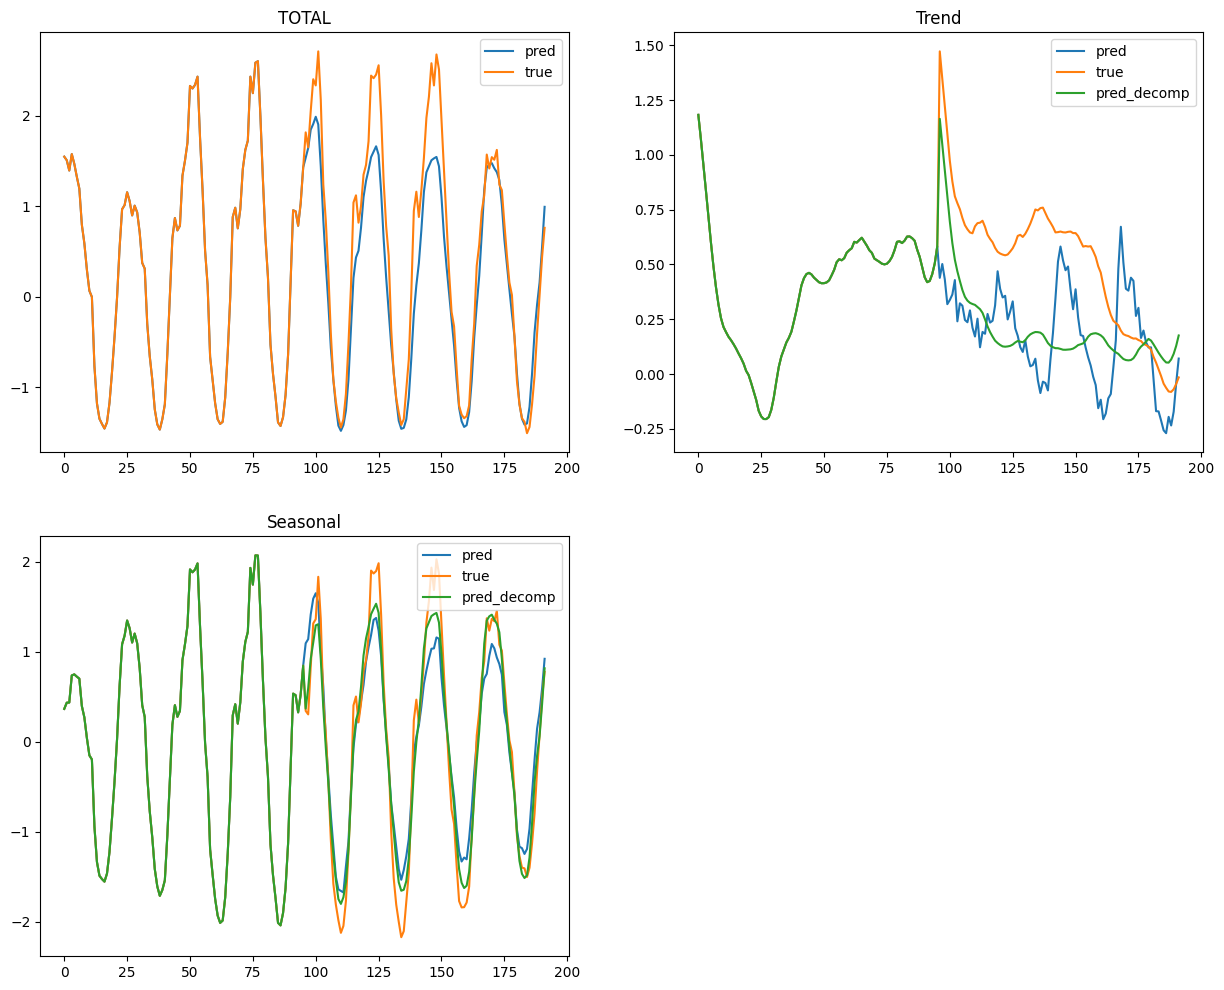

In [133]:
# plot
idx = 135
var = -1
xr = range(192)
X_OBJ = [[true_data_t1, pred_data_t1], [true_t_data_t1, pred_t_data_t1], [true_s_data_t1, pred_s_data_t1]]
pred_d_s_data_t1, pred_d_t_data_t1 = decomp25(torch.Tensor(pred_data_t1))
pred_d_s_data_t1, pred_d_t_data_t1 = pred_d_s_data_t1.detach().cpu().numpy(), pred_d_t_data_t1.detach().cpu().numpy()
ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])
y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_t1[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_t1[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

In [92]:
# result 가져오기 - 
res = 'long_term_forecast_traffic_96_96_PITS_decomp_custom_ftM_sl96_ll48_pl96_dm512_nh8_el4_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725878433)'
path = f'./results/{res}/'

pred_data_t2 = np.load(path + 'pred.npy') # 
true_data_t2 = np.load(path + 'true.npy') # 
pred_t_data_t2 = np.load(path + 'pred_trend.npy') # 
true_t_data_t2 = np.load(path + 'true_trend.npy') #
pred_s_data_t2 = np.load(path + 'pred_seasonal.npy')
true_s_data_t2 = np.load(path + 'true_seasonal.npy')


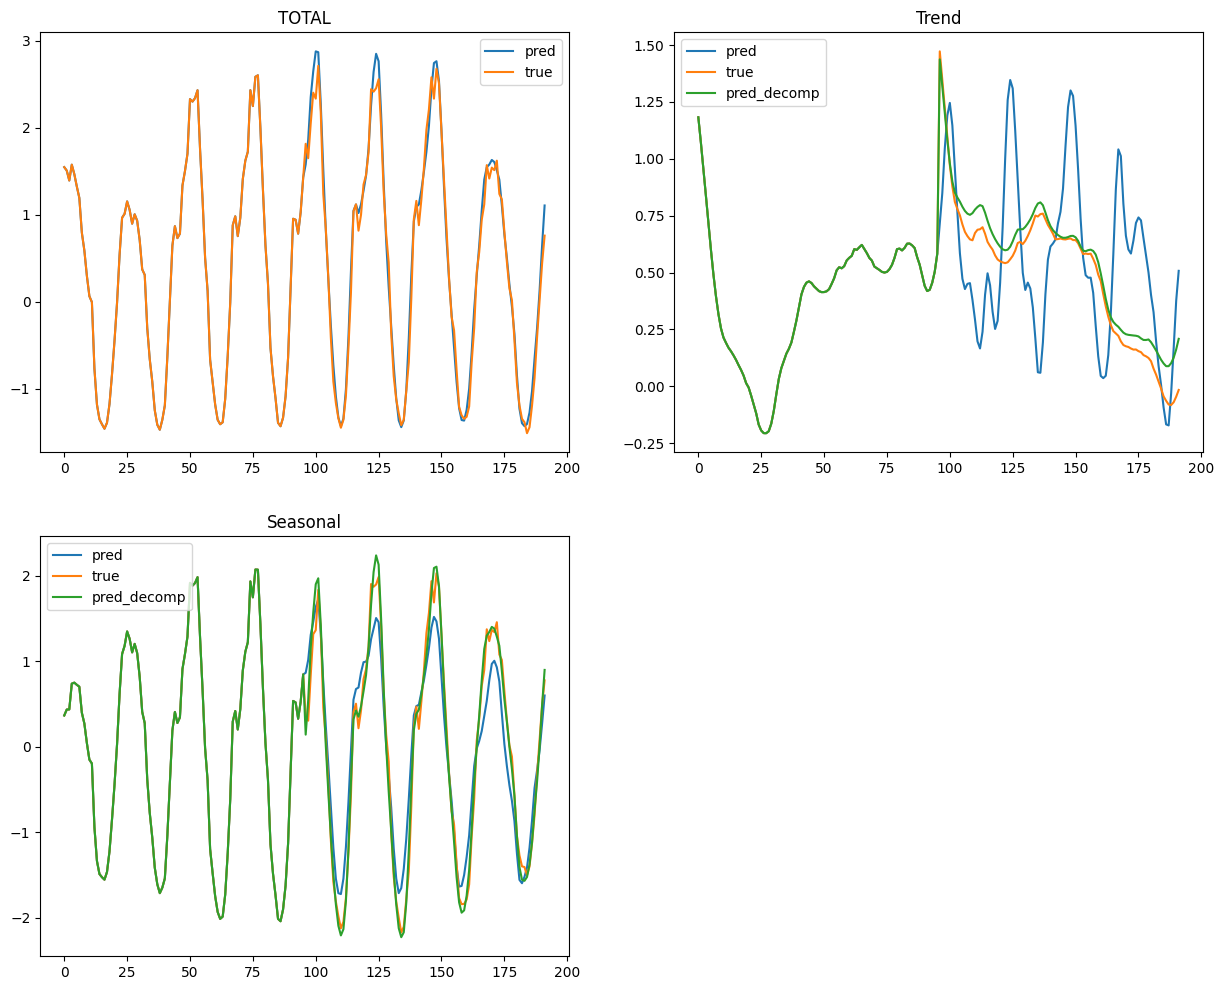

In [138]:
# plot
idx = 135
var = -1
xr = range(192)
X_OBJ = [[true_data_t2, pred_data_t2], [true_t_data_t2, pred_t_data_t2], [true_s_data_t2, pred_s_data_t2]]
pred_d_s_data_t2, pred_d_t_data_t2 = decomp25(torch.Tensor(pred_data_t2))
pred_d_s_data_t2, pred_d_t_data_t2 = pred_d_s_data_t2.detach().cpu().numpy(), pred_d_t_data_t2.detach().cpu().numpy()
ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])
y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_t2[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_t2[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

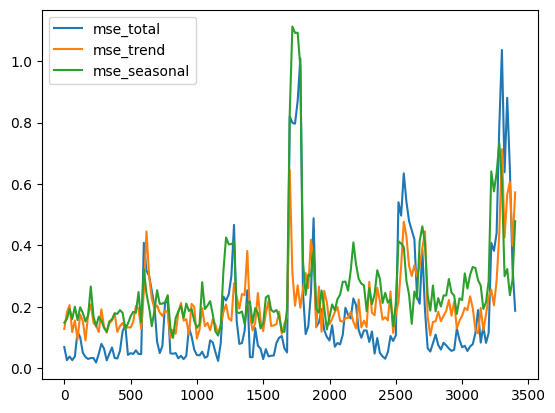

In [96]:
# 분포 분석

pred0 = pred_data_t2.copy()
true0 = true_data_t2.copy()
predt0 = pred_t_data_t2.copy()
truet0 = true_t_data_t2.copy()
preds0 = pred_s_data_t2.copy()
trues0 = true_s_data_t2.copy()

mse_0 = []
mse_t0 = []
mse_s0 = []
for kdx in range(0, len(pred0), 20):
    mse_0.append(MSE(pred0[kdx, :, -1], true0[kdx, :, -1]))
    mse_t0.append(MSE(predt0[kdx, :, -1], truet0[kdx, :, -1]))
    mse_s0.append(MSE(preds0[kdx, :, -1], trues0[kdx, :, -1]))

plt.plot(range(0, len(pred0), 20), mse_0, label="mse_total")
plt.plot(range(0, len(pred0), 20), mse_t0, label="mse_trend")
plt.plot(range(0, len(pred0), 20), mse_s0, label="mse_seasonal")
plt.legend()
plt.show()

In [97]:
# result 가져오기 - 
res = 'long_term_forecast_traffic_96_96_D_m97_DLinear_decomp_custom_ftM_sl96_ll48_pl96_dm512_nh8_el1_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725956850)'
path = f'./results/{res}/'

pred_data_t3 = np.load(path + 'pred.npy') # 
true_data_t3 = np.load(path + 'true.npy') # 
pred_t_data_t3 = np.load(path + 'pred_trend.npy') # 
true_t_data_t3 = np.load(path + 'true_trend.npy') #
pred_s_data_t3 = np.load(path + 'pred_seasonal.npy')
true_s_data_t3 = np.load(path + 'true_seasonal.npy')


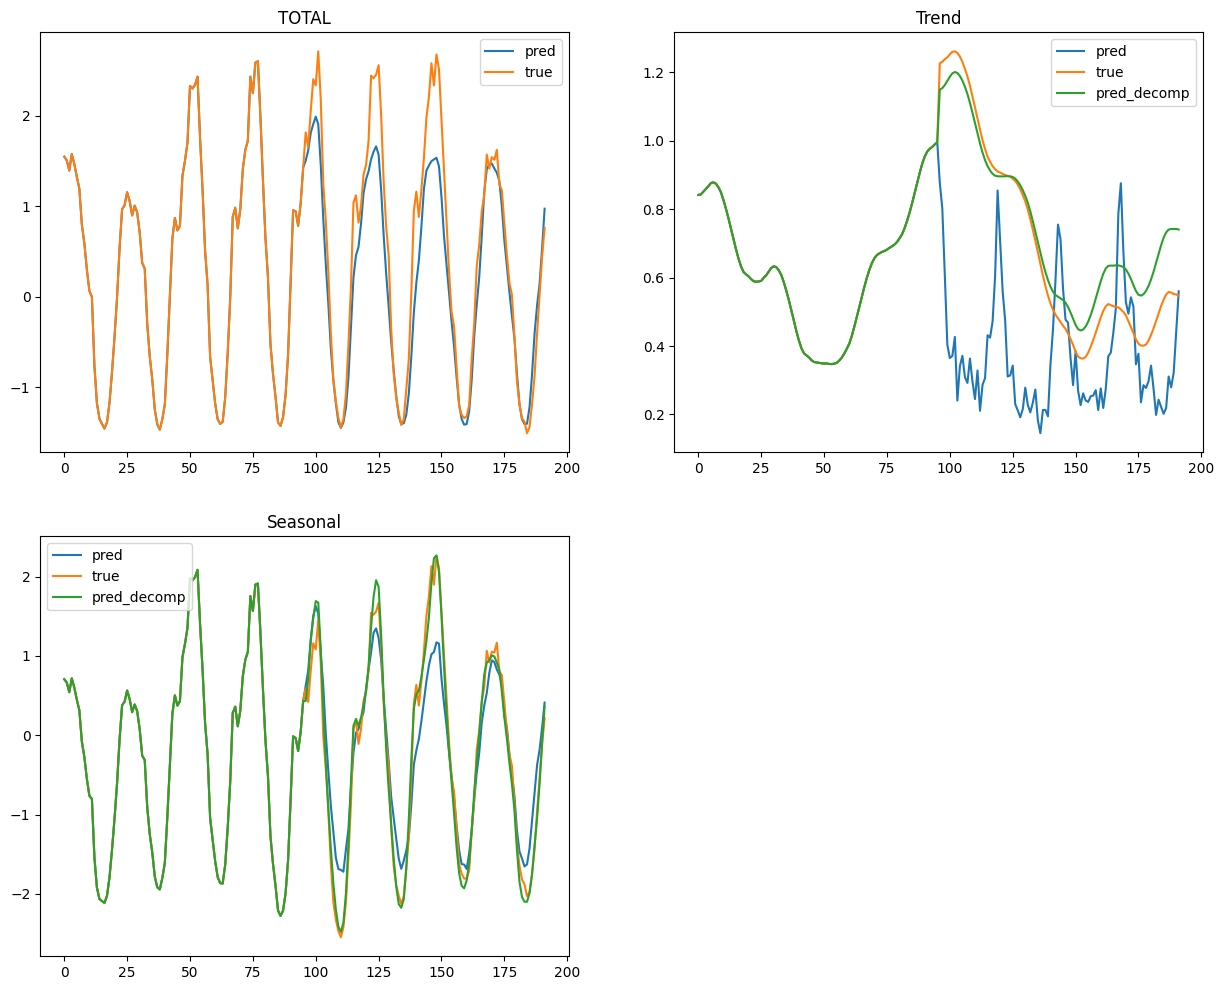

In [139]:
# plot
idx = 135
var = -1
xr = range(192)
X_OBJ = [[true_data_t3, pred_data_t3], [true_t_data_t3, pred_t_data_t3], [true_s_data_t3, pred_s_data_t3]]
pred_d_s_data_t3, pred_d_t_data_t3 = decomp97(torch.Tensor(pred_data_t2))
pred_d_s_data_t3, pred_d_t_data_t3 = pred_d_s_data_t3.detach().cpu().numpy(), pred_d_t_data_t3.detach().cpu().numpy()
ttype = 0
y1 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][1][idx + 96, :, var]])
y2 = np.concatenate([X_OBJ[0][0][idx, :, var] , X_OBJ[0][0][idx + 96, :, var]])
y3 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][1][idx + 96, :, var]])
y4 = np.concatenate([X_OBJ[1][0][idx, :, var] , X_OBJ[1][0][idx + 96, :, var]])
y5 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][1][idx + 96, :, var]])
y6 = np.concatenate([X_OBJ[2][0][idx, :, var] , X_OBJ[2][0][idx + 96, :, var]])
y12 = np.concatenate([X_OBJ[1][0][idx, :, var] , pred_d_t_data_t3[idx + 96, :, var]])
y13 = np.concatenate([X_OBJ[2][0][idx, :, var] , pred_d_s_data_t3[idx + 96, :, var]])

plt.figure(figsize=(15,12))
# 2x2 그리드의 첫 번째 플롯
plt.subplot(2, 2, 1)
plt.plot(xr, y1, label='pred')
plt.plot(xr, y2, label='true')
plt.legend()
plt.title("TOTAL")

# 2x2 그리드의 두 번째 플롯
plt.subplot(2, 2, 2)
plt.plot(xr, y3, label='pred')
plt.plot(xr, y4, label='true')
plt.plot(xr, y12, label='pred_decomp')
plt.legend()
plt.title("Trend")

# 2x2 그리드의 세 번째 플롯
plt.subplot(2, 2, 3)
plt.plot(xr, y5, label='pred')
plt.plot(xr, y6, label='true')
plt.plot(xr, y13, label='pred_decomp')
plt.title("Seasonal")

plt.legend()
plt.show()

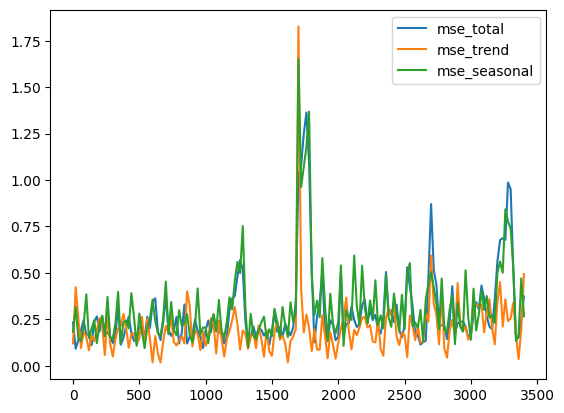

In [99]:
# 분포 분석

pred0 = pred_data_t3.copy()
true0 = true_data_t3.copy()
predt0 = pred_t_data_t3.copy()
truet0 = true_t_data_t3.copy()
preds0 = pred_s_data_t3.copy()
trues0 = true_s_data_t3.copy()

mse_0 = []
mse_t0 = []
mse_s0 = []
for kdx in range(0, len(pred0), 20):
    mse_0.append(MSE(pred0[kdx, :, -1], true0[kdx, :, -1]))
    mse_t0.append(MSE(predt0[kdx, :, -1], truet0[kdx, :, -1]))
    mse_s0.append(MSE(preds0[kdx, :, -1], trues0[kdx, :, -1]))

plt.plot(range(0, len(pred0), 20), mse_0, label="mse_total")
plt.plot(range(0, len(pred0), 20), mse_t0, label="mse_trend")
plt.plot(range(0, len(pred0), 20), mse_s0, label="mse_seasonal")
plt.legend()
plt.show()